<a href="https://colab.research.google.com/github/JanhviSharma1/Employee-attrition-prediction/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Data Processing

In [8]:
# loading the data
Employees = pd.read_csv('HR-Employee-Attrition.csv')

In [16]:
Employees.shape

(1470, 35)

In [20]:
#Printing the first 5 rows
Employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Yes --> 1

No  --> 0

In [21]:
#Replacing Yes with one and No with 0 under Attrition column
Employees.replace('Yes', 1, inplace=True)
Employees.replace('No', 0, inplace=True)

In [13]:
Employees.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1383,36,0,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,...,2,80,0,5,3,3,5,4,0,2
213,51,0,Travel_Rarely,1469,Research & Development,8,4,Life Sciences,1,296,...,4,80,2,16,5,1,10,9,4,7
662,20,1,Travel_Rarely,500,Sales,2,3,Medical,1,922,...,4,80,0,2,3,2,2,2,0,2
945,50,0,Travel_Rarely,1322,Research & Development,28,3,Life Sciences,1,1317,...,2,80,0,25,2,3,3,2,1,2
473,49,0,Travel_Rarely,1245,Research & Development,18,4,Life Sciences,1,638,...,3,80,1,31,5,3,31,9,0,9


In [24]:
# Drop columns not useful for prediction
Employees_clean = Employees.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [25]:
# Encode categorical variables
categorical_cols = Employees_clean.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    Employees_clean[col] = le.fit_transform(Employees_clean[col])
    label_encoders[col] = le

In [26]:
# Separate features and target
X = Employees_clean.drop('Attrition', axis=1)
y = Employees_clean['Attrition']

In [27]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training and Testing Models

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# Train model: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Predictions
log_preds = log_model.predict(X_test)

In [41]:
# Evaluation
log_report = classification_report(y_test, log_preds, output_dict=True)

In [42]:
accuracy_log = accuracy_score(y_test, log_preds)

In [40]:
accuracy_log, log_report['weighted avg']

(0.8945578231292517,
 {'precision': 0.881066587218829,
  'recall': 0.8945578231292517,
  'f1-score': 0.8794734195623077,
  'support': 294.0})

In [38]:
#Training model: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
#Prediction
rf_preds = rf_model.predict(X_test)

In [49]:
#Evaluation
rf_report = classification_report(y_test, rf_preds, output_dict=True)

In [44]:
accuracy_rf = accuracy_score(y_test, rf_preds)

In [45]:
accuracy_rf, rf_report['weighted avg']

(0.8809523809523809,
 {'precision': 0.8754960317460316,
  'recall': 0.8809523809523809,
  'f1-score': 0.8409190563886697,
  'support': 294.0})

#Visualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Get feature importances from the random forest model
importances = rf_model.feature_importances_
feature_names = X.columns

In [52]:
# Create DataFrame and plot
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-55-cadecb0f4165>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15), palette='viridis')


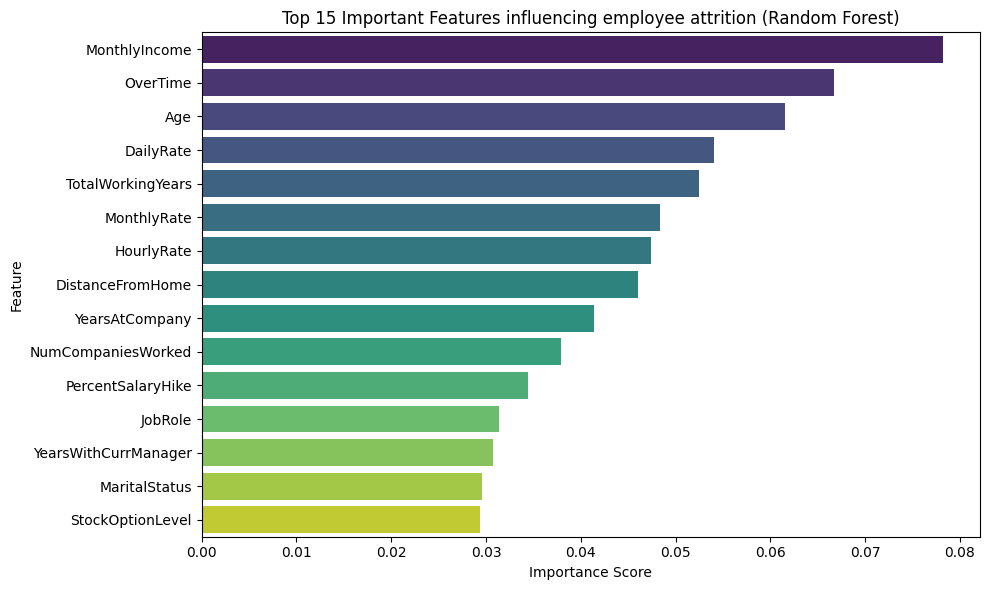

In [55]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15), palette='viridis')
plt.title('Top 15 Important Features influencing employee attrition (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#Serialization

In [56]:
import pickle